In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from Code import Simple_Monte_Carlo as mc
import pySCATMECH as scatmech
from pySCATMECH.fresnel import *

### Test Prob distance 

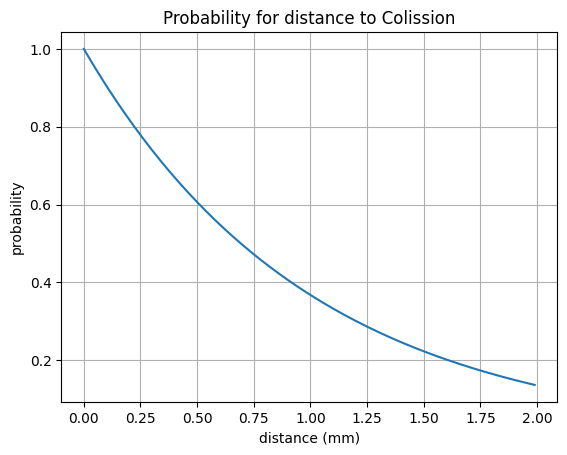

In [2]:
d = np.arange(0.0, 2.0, 0.01)
y = mc.ProbDist(d,1)

#fig, ax = plt.subplots()
plt.plot(d, y)

plt.xlabel('distance (mm)')
plt.ylabel('probability')
plt.title('Probability for distance to Colission')
plt.grid()


plt.show()

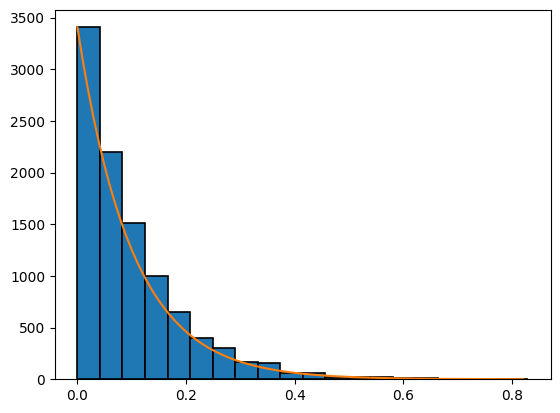

In [3]:
beta = 0.1;
xRand = np.random.rand(10000);
xSamples = mc.ExpSample(xRand,beta)
out=plt.hist(xSamples,bins=20, edgecolor='black', linewidth=1.2)

d = np.arange(0.0, np.max(xSamples), 0.01)
y = mc.ProbDist(d,beta)
plt.plot(d,out[0][0]*beta*y)

### Test rand num gen

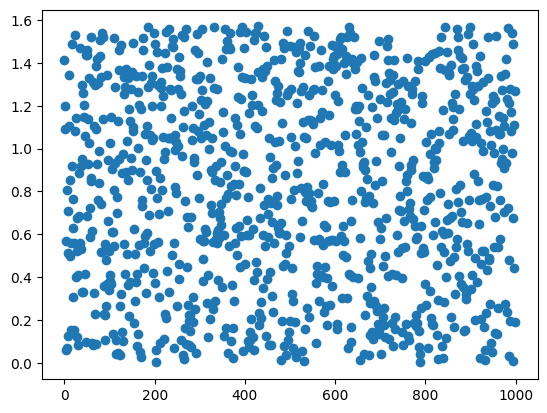

In [4]:
[thetas, phis] = mc.IsotropicPhaseFunction(1000)
plt.scatter(np.arange(0,len(thetas),1),thetas)

### Test Ray/Material

In [2]:
inputRay = mc.Ray( mc.KVector(0,0), np.array([0,0,0]), 0.5)
inputRay.k

array([0., 0., 1.])

In [3]:
inputRay.OPLCumulative()

0

In [5]:
mat = mc.Material(1.5+ 0.0000023*1j, 0.001)

In [7]:
mat.k

2.3e-06

### Test PRT

[[1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+1.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j]]


[0.        +0.j 0.70710678+0.j 0.70710678+0.j]


In [4]:
# k test 2 
jm = np.array([[1,0],[0,1j]])
eta = mc.normalize([0,1,1])
kin = eta
kout = mc.normalize([0,1,1])

prt = mc.PRT(jm, eta, kin, kout)
kOut = prt.dot(kin);
print(kOut)

[0.        +0.j 0.70710678+0.j 0.70710678+0.j]


In [10]:
# x test 1 
jm = (1/np.sqrt(2))*np.array([[1,1j],[1j,1]])
eta = mc.normalize([0,0,1])
kin = mc.normalize([0,1,1])
kout = eta

prt = mc.PRT(jm, eta, kin, kout)
kOut = prt.dot([1,0,0]);
print(prt)
print(kOut)

[[ 0.70710678+0.j          0.        +0.5j         0.        -0.5j       ]
 [ 0.        +0.70710678j  0.5       +0.j         -0.5       +0.j        ]
 [ 0.        +0.j          0.70710678+0.j          0.70710678+0.j        ]]
[0.70710678+0.j         0.        +0.70710678j 0.        +0.j        ]


In [7]:
prt

array([[0.70710678+0.j , 0.        +0.5j, 0.        -0.5j],
       [0.        +0.5j, 0.85355339+0.j , 0.14644661+0.j ],
       [0.        -0.5j, 0.14644661+0.j , 0.85355339+0.j ]])

### Refract/Reflect3D

In [2]:
kIn = mc.normalize([0,1,1])
eta = mc.normalize([0,0,1])
kOut = mc.Refract3D(1.0,1.5,eta,kIn)
kOut

array([-0.        ,  0.47140452,  0.8819171 ])

In [3]:
mc.vectorAngle(eta,kOut)/mc.deg

28.125505702055694

In [5]:
mc.SnellsLaw(1.,1.5,45*mc.deg)/mc.deg

28.125505702055708

In [2]:
mc.Reflect3D(np.array([0,0,1])  ,mc.normalize([0,1,1]))

array([ 0.        ,  0.70710678, -0.70710678])

In [3]:
mc.Reflect3D(np.array([0,0,-1])  ,mc.normalize([0,1,-1]))

array([0.        , 0.70710678, 0.70710678])

### +MC test Simple

In [2]:
np.random.seed(2)
ray1 = mc.Ray( mc.KVector(0,0), np.array([0,0,0]), 0.5)
ray2 = mc.Ray( mc.KVector(0,0), np.array([0,0,0]), 0.5)
mat = mc.Material(1.5+ 0.0000023*1j, 0.0000001, 10E-7)

mc.MonteCarloTrace(ray1, mat, debug = True)
mc.MonteCarloTrace(ray2, mat, debug = True)

CHECK TRiggered!!!!!
REFLECT
CHECK TRiggered!!!!!
Transmit
CHECK TRiggered!!!!!
Transmit
CHECK TRiggered!!!!!
Transmit


In [3]:
ray1.r

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  5.72691989e-08],
       [-4.42516996e-09, -1.42745674e-09,  1.14229767e-07],
       [-1.55789526e-08,  1.78530373e-08,  1.19533936e-07],
       [-8.04832174e-09,  1.69992771e-08,  8.94360848e-08],
       [-2.21604728e-08,  1.46596248e-08,  8.73643369e-08],
       [-2.49935164e-08,  1.44854382e-07,  1.69319063e-07],
       [-1.04801860e-07,  3.40476008e-09,  7.57324126e-08],
       [-1.09043941e-07, -1.20750936e-09,  7.82453338e-08],
       [-1.05563056e-07, -1.70852428e-09,  9.13830863e-08],
       [-1.04811769e-07,  9.08660367e-09,  8.80914762e-08],
       [-1.26728623e-07,  6.61864627e-08,  7.26889127e-08],
       [-1.75255204e-07,  9.77468831e-08,  1.04360634e-07],
       [-2.12584025e-07,  1.40987619e-07,  0.00000000e+00]])

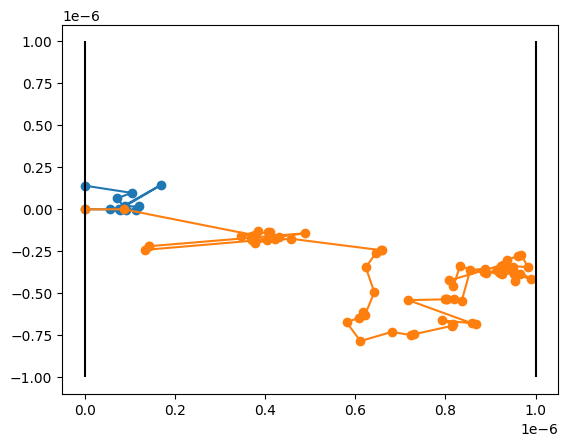

In [4]:
mc.PlotRayPath(ray1)
mc.PlotRayPath(ray2)
mc.PlotMaterial(mat,scale = 1, ax=plt)

### Trial Small

In [2]:
mat = mc.Material(1.5+ 0.0000023*1j, 0.000002, 10E-7)
raySmall = mc.MonteCarloTrial(15, mat, 0.5, mc.KVector(0,0), debug = False)

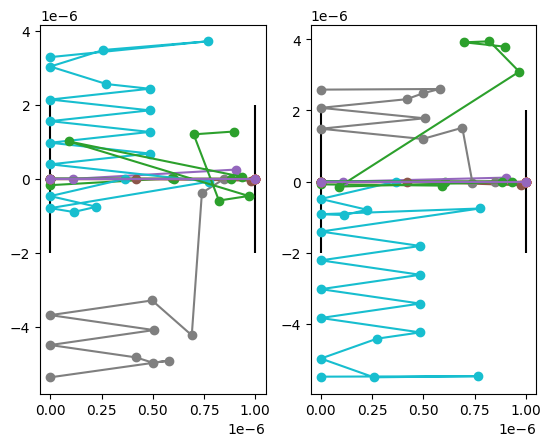

In [3]:
fig, ax = plt.subplots(1,2)

mc.PlotMaterial(mat,scale = 2, ax=ax[0])
for ray in raySmall :
    mc.PlotRayPath(ray, slice = 1, ax=ax[0])    

mc.PlotMaterial(mat,scale = 2, ax=ax[1])
for ray in raySmall :
    mc.PlotRayPath(ray, slice = 0, ax=ax[1])    

In [4]:
## reflect

kk = mc.normalize([0,.1,-1])
k = mc.Refract3D(1.5, 1 , np.array([0,0,-1]), kk )
live = mc.TIRCheck(1.5,1.0,np.array([0,0,-1]),kk)

print("TIR?",live,kk,k)

TIR? False [ 0.          0.09950372 -0.99503719] [-0.          0.14925558 -0.98879865]


###  Trial Large

In [6]:
rays = mc.MonteCarloTrial(10000, mat, 0.5, mc.KVector(0,0), debug = False)

#### bin by angle

(array([ 69.,  68.,  76., 101., 105., 115., 120., 137., 137., 127., 146.,
        144., 133., 118., 112., 102.,  97.,  65.,  30.,  20.]),
 array([8.98048841e-04, 7.76930338e-02, 1.54488019e-01, 2.31283004e-01,
        3.08077989e-01, 3.84872974e-01, 4.61667959e-01, 5.38462944e-01,
        6.15257929e-01, 6.92052914e-01, 7.68847898e-01, 8.45642883e-01,
        9.22437868e-01, 9.99232853e-01, 1.07602784e+00, 1.15282282e+00,
        1.22961781e+00, 1.30641279e+00, 1.38320778e+00, 1.46000276e+00,
        1.53679775e+00]),
 <BarContainer object of 20 artists>)

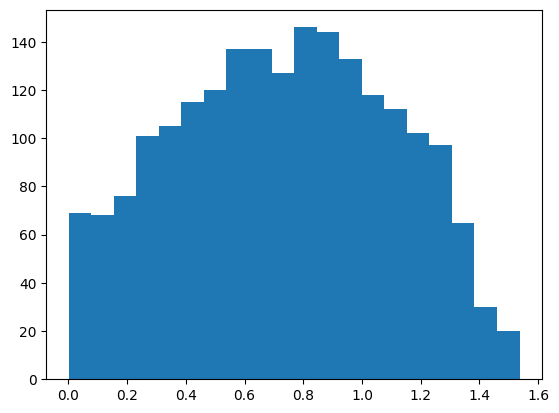

In [16]:
[binRef,binTrans ] = mc.BinRaysAngle(rays)
plt.hist(binRef,20)

(array([6128.,   71.,   69.,   99.,  102.,   90.,  115.,  129.,  138.,
         135.,  123.,  134.,  135.,  102.,   98.,  104.,   67.,   67.,
          49.,   23.]),
 array([0.        , 0.07603816, 0.15207631, 0.22811447, 0.30415263,
        0.38019079, 0.45622894, 0.5322671 , 0.60830526, 0.68434341,
        0.76038157, 0.83641973, 0.91245789, 0.98849604, 1.0645342 ,
        1.14057236, 1.21661051, 1.29264867, 1.36868683, 1.44472499,
        1.52076314]),
 <BarContainer object of 20 artists>)

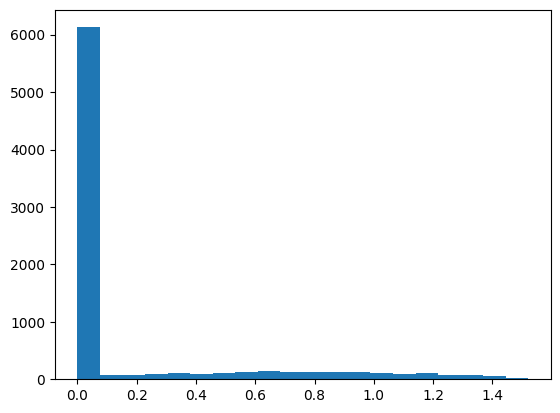

In [17]:
plt.hist(binTrans,20)

In [18]:
[refRays,transRays] = mc.SortRefTrans(rays)
print(np.size(refRays) )
print(np.size(transRays))

2022
7978


In [24]:
ray = transRays[2]
for i,ray in enumerate(transRays):
    angle = mc.vectorAngle(np.array([0,0,1]), ray.k)
    if angle > pi/2:
        print(i,angle)

#### Bin By Position

(array([1.275e+03, 3.030e+02, 1.810e+02, 8.900e+01, 6.400e+01, 3.500e+01,
        2.800e+01, 1.500e+01, 1.200e+01, 5.000e+00, 3.000e+00, 5.000e+00,
        4.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([1.38704662e-11, 1.12657861e-06, 2.25314334e-06, 3.37970807e-06,
        4.50627281e-06, 5.63283754e-06, 6.75940228e-06, 7.88596701e-06,
        9.01253175e-06, 1.01390965e-05, 1.12656612e-05, 1.23922260e-05,
        1.35187907e-05, 1.46453554e-05, 1.57719202e-05, 1.68984849e-05,
        1.80250496e-05, 1.91516144e-05, 2.02781791e-05, 2.14047438e-05,
        2.25313086e-05]),
 <BarContainer object of 20 artists>)

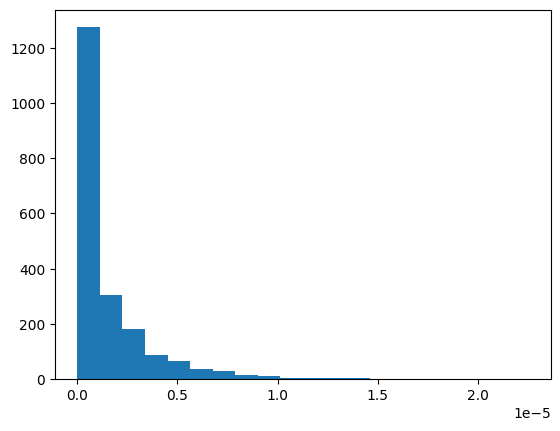

In [19]:
[binRef,binTrans ] = mc.BinRaysPosition(rays)

plt.hist(binRef,20)

(array([7.273e+03, 2.380e+02, 1.310e+02, 9.900e+01, 6.800e+01, 4.700e+01,
        3.700e+01, 2.000e+01, 1.400e+01, 2.200e+01, 9.000e+00, 7.000e+00,
        4.000e+00, 2.000e+00, 3.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00]),
 array([6.00571280e-07, 1.37887582e-06, 2.15718035e-06, 2.93548489e-06,
        3.71378943e-06, 4.49209396e-06, 5.27039850e-06, 6.04870304e-06,
        6.82700757e-06, 7.60531211e-06, 8.38361664e-06, 9.16192118e-06,
        9.94022572e-06, 1.07185303e-05, 1.14968348e-05, 1.22751393e-05,
        1.30534439e-05, 1.38317484e-05, 1.46100529e-05, 1.53883575e-05,
        1.61666620e-05]),
 <BarContainer object of 20 artists>)

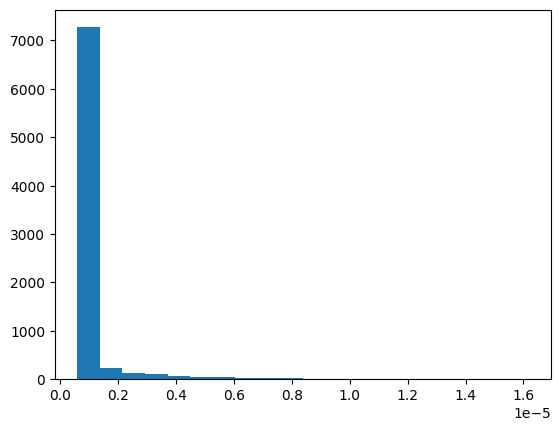

In [20]:
plt.hist(binTrans,20)

#### Bin by Interactions

(array([1.132e+03, 2.870e+02, 1.940e+02, 1.350e+02, 8.200e+01, 5.000e+01,
        4.500e+01, 2.200e+01, 2.400e+01, 1.700e+01, 9.000e+00, 1.000e+01,
        5.000e+00, 4.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 2.  ,  6.15, 10.3 , 14.45, 18.6 , 22.75, 26.9 , 31.05, 35.2 ,
        39.35, 43.5 , 47.65, 51.8 , 55.95, 60.1 , 64.25, 68.4 , 72.55,
        76.7 , 80.85, 85.  ]),
 <BarContainer object of 20 artists>)

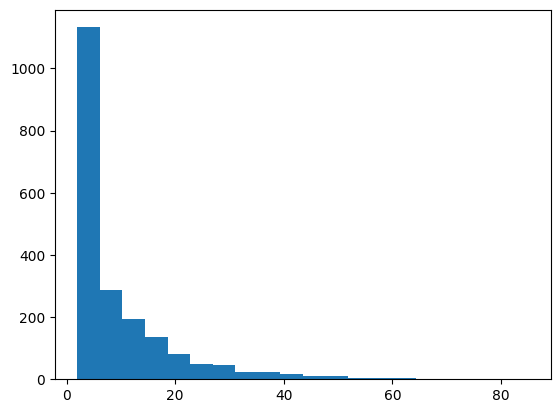

In [21]:
[binRef,binTrans ] = mc.BinRaysInteraction(rays)
plt.hist(binRef,20)

(array([7.343e+03, 3.090e+02, 1.580e+02, 7.700e+01, 5.600e+01, 2.000e+01,
        5.000e+00, 6.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  1.  ,   8.05,  15.1 ,  22.15,  29.2 ,  36.25,  43.3 ,  50.35,
         57.4 ,  64.45,  71.5 ,  78.55,  85.6 ,  92.65,  99.7 , 106.75,
        113.8 , 120.85, 127.9 , 134.95, 142.  ]),
 <BarContainer object of 20 artists>)

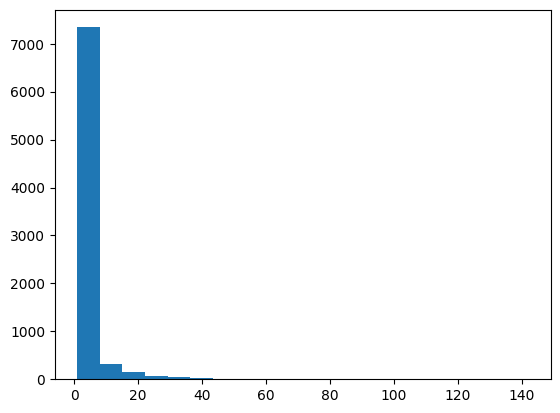

In [22]:
plt.hist(binTrans,20)

### Jones 

In [ ]:
## TODO -- bin rays by interaction type counts

In [33]:
air = OpticalFunction(1.0)
glass = OpticalFunction(1.5)

stack = FilmStack()
# Return a Jones matrix
r = stack.reflectionCoefficient(60*deg, wavelength, air, glass)
r

[[(-0.42020410288672866+0j), 0j], [0j, (-0.04244923464074502+0j)]]

### generate BSDF

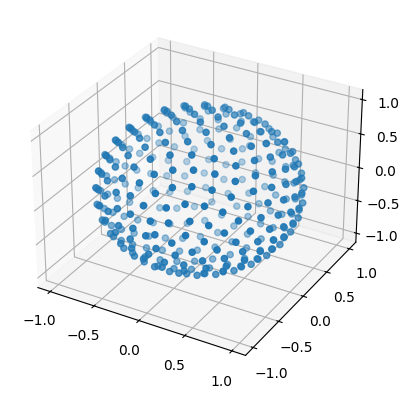

In [5]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
pts = mc.fibonacci_sphere(samples=350)
xs = np.array(pts)[:,0]
ys =  np.array(pts)[:,1]
zs =  np.array(pts)[:,2]
ax.scatter(xs, ys, zs)

In [19]:
#now bin trans vs reflected rays
#get trans directions


In [14]:
kIn =  mc.KVector(10*deg,35*deg)
[theta,phi] = mc.KAnglesThetaPhi(kIn,1)
[theta,phi]

[0.17453292519943317, 0.6108652381980152]

In [16]:
## todo get vector angle theta and phi
## plot ray transmission i.e. sum mueller matrices
[10*deg,35*deg]

[0.17453292519943295, 0.6108652381980153]

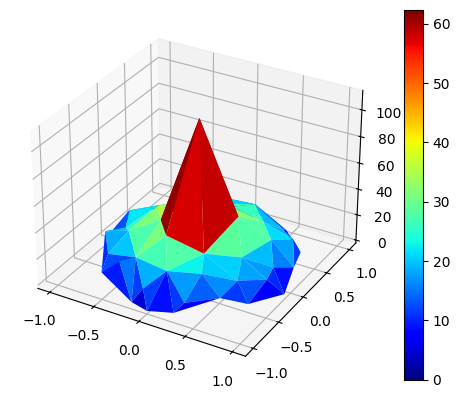

In [23]:
#%matplotlib notebook
%matplotlib inline
[binRef, binTrans] = mc.BinRaysBSDF(rays,100)
xs=[]
ys=[]
zs=[]
for input in binRef:
    [k,raysTemp] = input
    xs.append(k[0])
    ys.append(k[1])
    zs.append(len(raysTemp))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_trisurf(xs, ys, zs, cmap=cm.jet, linewidth=0,vmin=0)
fig.colorbar(surf)

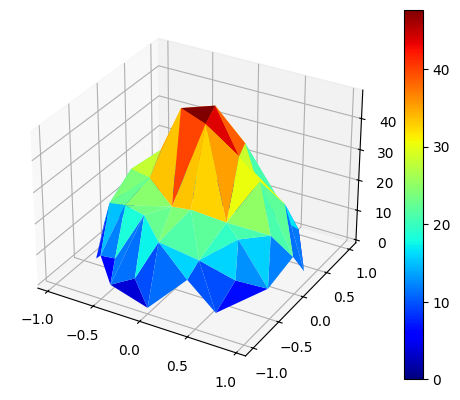

In [24]:
#%matplotlib notebook
%matplotlib inline
xs=[]
ys=[]
zs=[]
for input in binTrans:
    [k,raysTemp] = input
    xs.append(k[0])
    ys.append(k[1])
    zs.append(len(raysTemp))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_trisurf(xs, ys, zs, cmap=cm.jet, linewidth=0,vmin=0)
fig.colorbar(surf)
plt.show()

In [25]:
##TODO -- clean up code
# ---- add in rayleigh scatter
# ----- run on larger set
# conversion to Mueller

binRef[10]

[array([-0.03638129,  0.61616162, -0.78677904]),

In [28]:
binRef[10][1][1].k

array([-0.10163685,  0.57456484, -0.81212388])